#Name: Giodio N P Mitaart
#NIM: 2201768310
#LA01 - (COMP6577)

#Logistic Regression

Feature Engineering

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load dataset
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#fill missing values
df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,0,0


In [ ]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features from object to float (i tried to convert from object to int but it didn't work)
#selected features based on numeric dataset
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')


In [ ]:
#data cleansing
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

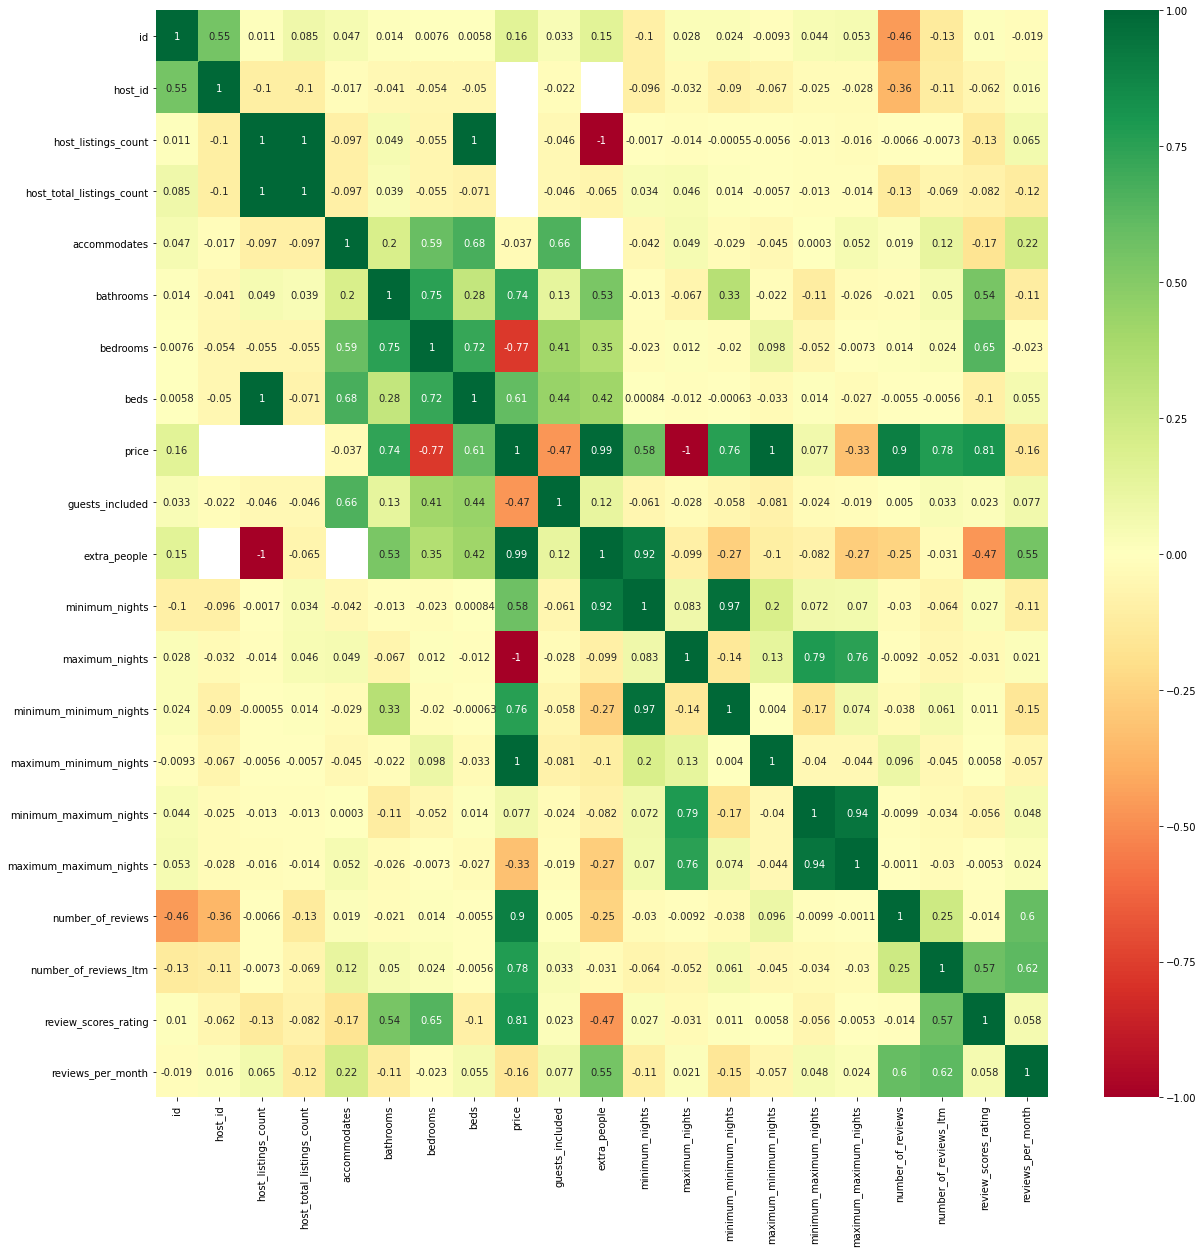

In [ ]:
#find good features using correlation matrix heatmap
#the target prediction is price
X = df.iloc[:, 0:29]
y = df["price"]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sb.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Feature Selection

In [ ]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

#check new dataset info
newDF.info()

print(newDF.round(0).astype(int))
print(newDF.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   accommodates            13049 non-null  int64
 1   bathrooms               13049 non-null  int64
 2   beds                    13049 non-null  int64
 3   guests_included         13049 non-null  int64
 4   extra_people            13049 non-null  int64
 5   minimum_nights          13049 non-null  int64
 6   minimum_minimum_nights  13049 non-null  int64
 7   maximum_maximum_nights  13049 non-null  int64
 8   number_of_reviews       13049 non-null  int64
 9   number_of_reviews_ltm   13049 non-null  int64
 10  review_scores_rating    13049 non-null  int64
 11  reviews_per_month       13049 non-null  int64
 12  price                   13049 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  ...  reviews_per_month  price
0                 1      

Prepare the training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#prepare the training set
X = newDF
y = newDF["price"]

Training Process

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Target Prediction

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


Evaluate model

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[2599    0    0    0    2    1    0    0]
 [   2    1    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2602
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         1
         139       0.00      0.00      0.00         1

    accuracy                           1.00      2610
   macro avg       0.25      0.17      0.19      2610
weighted avg       1.00      1.00      1.00      2610



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#KNN - Classification

Feature Engineering

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
#load dataset
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,0,0


In [ ]:
#data cleansing
for i in df:
    print(i, df[i].dtypes)
    if df[i].isna().values.any() and df[i].dtypes != object:
        df[i] = df[i].fillna(df[i].median())

# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

#split dataset to training and testing
train, test = train_test_split(df, test_size=0.2)

id int64
host_id float64
host_name object
host_response_time object
host_response_rate object
host_acceptance_rate object
host_neighbourhood object
host_listings_count float64
host_total_listings_count float64
neighbourhood object
neighbourhood_cleansed object
property_type object
room_type object
accommodates float64
bathrooms float64
bedrooms float64
beds float64
price float64
guests_included float64
extra_people float64
minimum_nights float64
maximum_nights float64
minimum_minimum_nights float64
maximum_minimum_nights float64
minimum_maximum_nights float64
maximum_maximum_nights float64
number_of_reviews float64
number_of_reviews_ltm float64
review_scores_rating float64
reviews_per_month float64


In [ ]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')

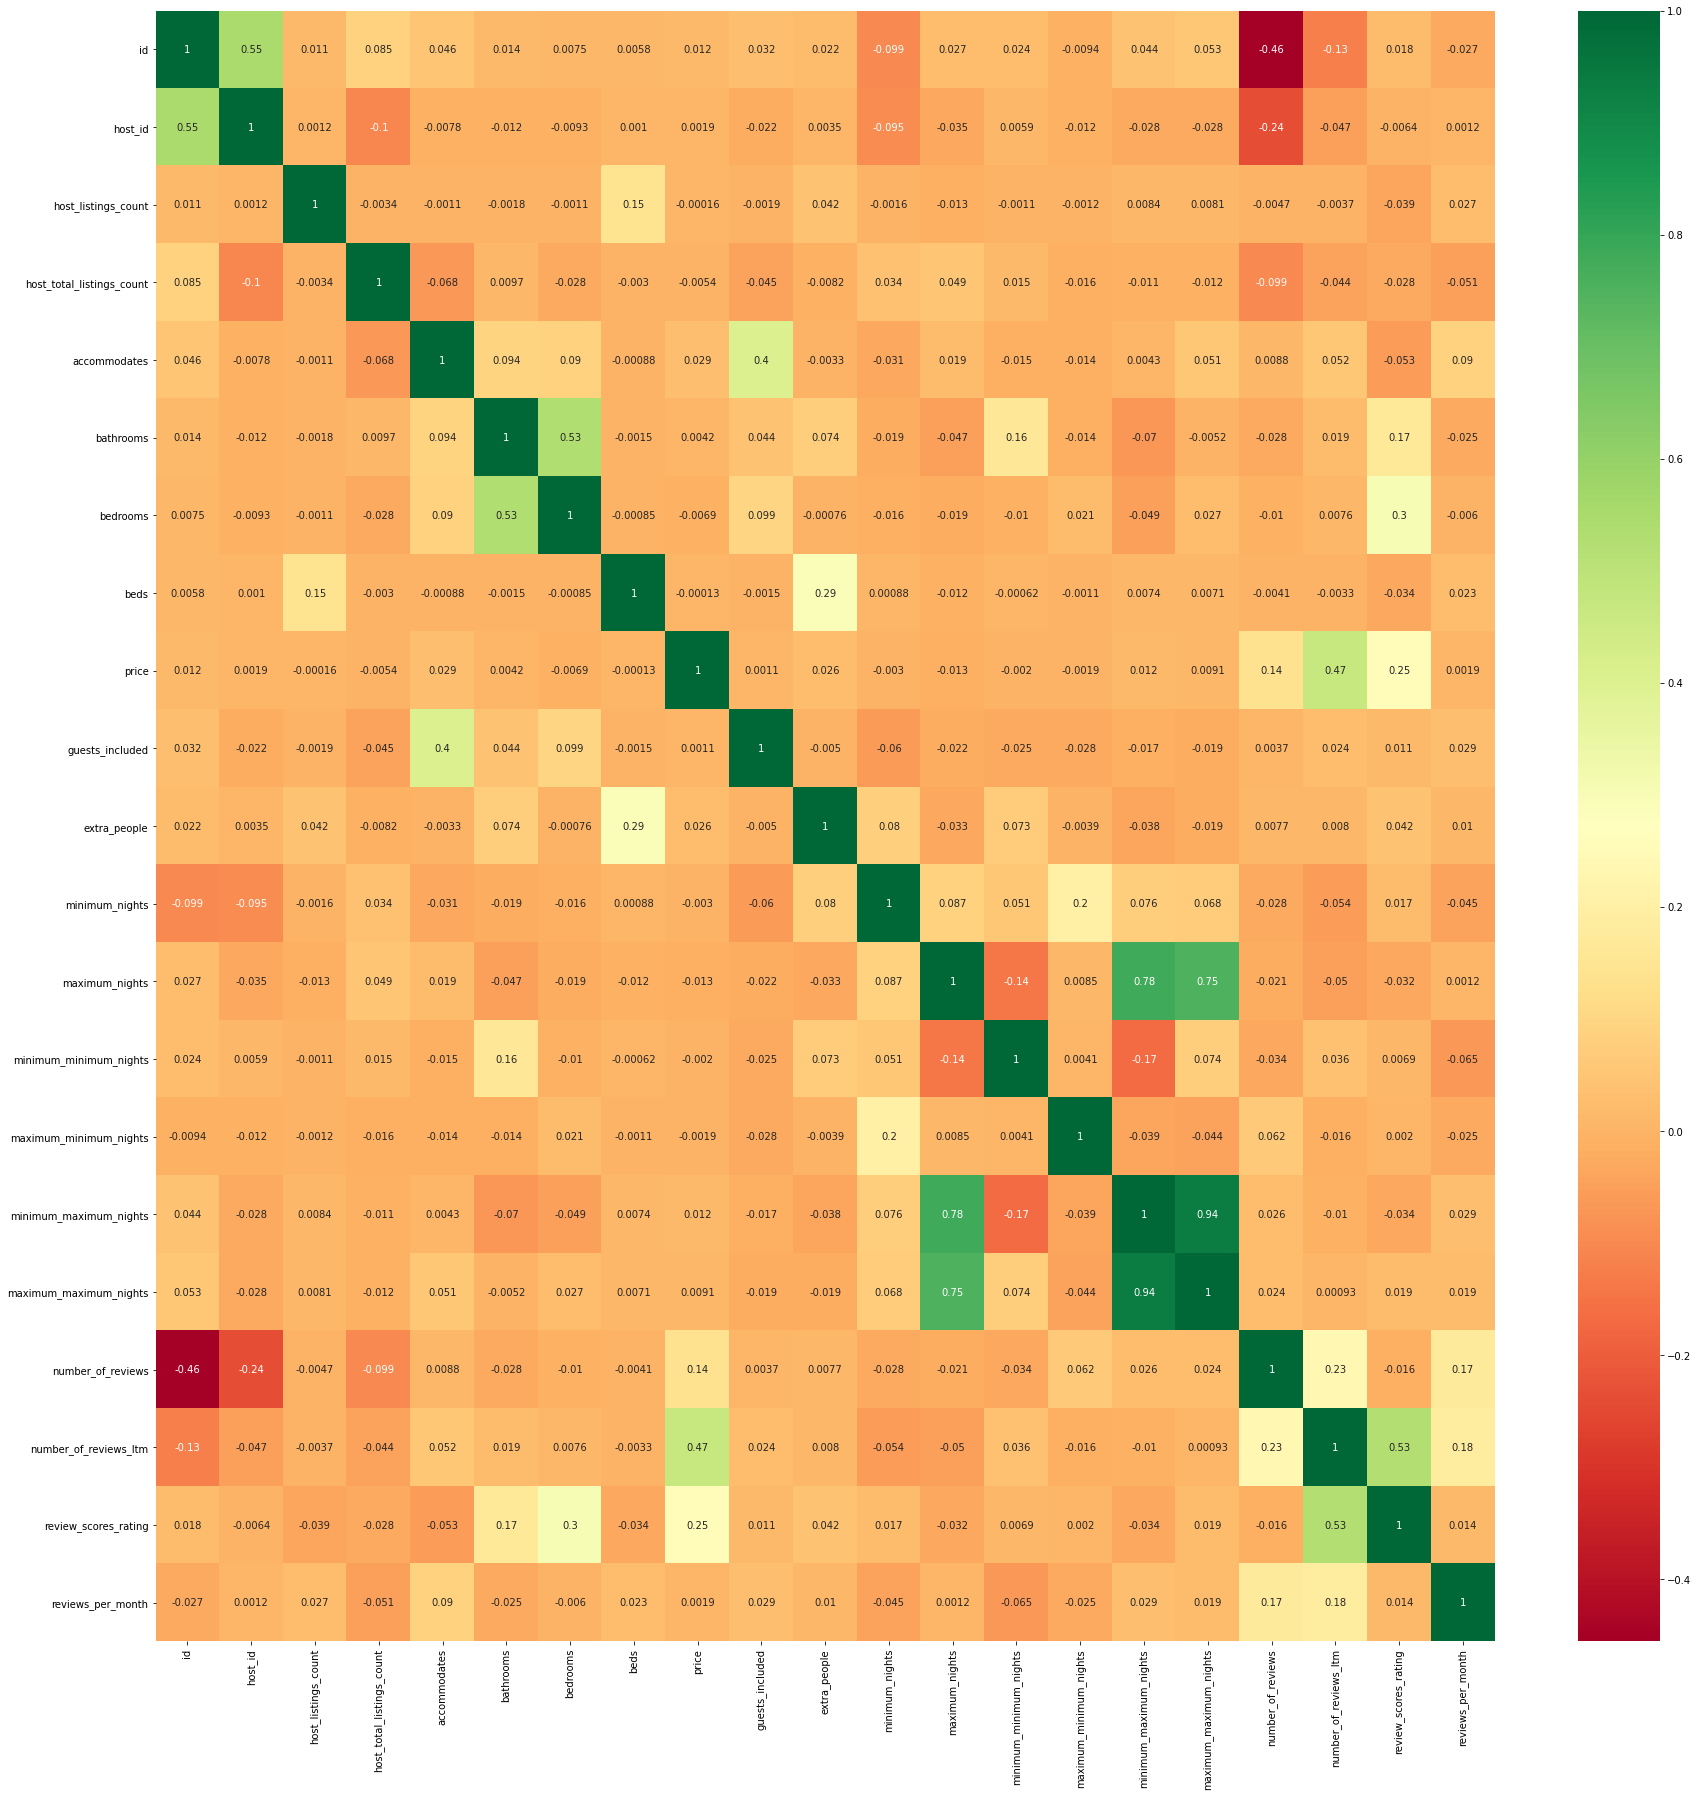

In [ ]:
#find good features using correlation matrix heatmap
X = df.iloc[:, 0:29]
y = df["review_scores_rating"]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g = sb.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Feature Selection

In [ ]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

newDF.info()

print(newDF.round(0).astype(int))
print(newDF.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   accommodates            13049 non-null  int64
 1   bathrooms               13049 non-null  int64
 2   beds                    13049 non-null  int64
 3   guests_included         13049 non-null  int64
 4   extra_people            13049 non-null  int64
 5   minimum_nights          13049 non-null  int64
 6   minimum_minimum_nights  13049 non-null  int64
 7   maximum_maximum_nights  13049 non-null  int64
 8   number_of_reviews       13049 non-null  int64
 9   number_of_reviews_ltm   13049 non-null  int64
 10  review_scores_rating    13049 non-null  int64
 11  reviews_per_month       13049 non-null  int64
 12  price                   13049 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  ...  reviews_per_month  price
0                 1      

Training Process

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 12).fit(train[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]], train["review_scores_rating"])

Evaluate

In [ ]:
#evaluate model
classification = KNN.predict(test[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]])
accuracy = accuracy_score(test["review_scores_rating"], classification)
MAE = mean_absolute_error(test["review_scores_rating"], classification)
MSE = mean_squared_error(test["review_scores_rating"], classification)

print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)

 ACC : 0.31
 MAE : 5.10
 MSE : 101.46


#SVM - Classification

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
#load data
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.fillna(0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,0,0


In [ ]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert all object columns to numeric, but this function can't be used because only some features need to be converted such as price, host_response_time and so on
# for i in df:
#     if df[i].dtypes == object:
#         df[i] = pd.to_numeric(df[i], errors='coerce')

#convert selected features
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')


#see if all the object is numeric
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13049 non-null  int64  
 1   host_id                    12711 non-null  float64
 2   host_name                  13003 non-null  object 
 3   host_response_time         12199 non-null  object 
 4   host_response_rate         12246 non-null  object 
 5   host_acceptance_rate       12729 non-null  object 
 6   host_neighbourhood         11234 non-null  object 
 7   host_listings_count        12713 non-null  float64
 8   host_total_listings_count  12913 non-null  float64
 9   neighbourhood              11861 non-null  object 
 10  neighbourhood_cleansed     13019 non-null  object 
 11  property_type              13048 non-null  object 
 12  room_type                  13045 non-null  object 
 13  accommodates               12724 non-null  flo

Training Process

In [ ]:
#training process
SVM = svm.SVC().fit(train[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]], train["review_scores_rating"])

Evaluate

In [ ]:
classification = SVM.predict(test[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]])
accuracy = accuracy_score(test["review_scores_rating"], classification)
MAE = mean_absolute_error(test["review_scores_rating"], classification)
MSE = mean_squared_error(test["review_scores_rating"], classification)
F1  = f1_score(test["review_scores_rating"], classification, average='weighted') 
# cnf_matrix = confusion_matrix(test["review_scores_rating"], classification, labels=[0,0])


print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)
print(" F1  : %.2f" % F1)
print (classification_report(test["review_scores_rating"], classification))
print(cnf_matrix)

 ACC : 0.23
 MAE : 5.23
 MSE : 567.09
 F1  : 0.09
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00        17
        63.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         3
        68.0       0.00      0.00      0.00         2
        69.0       0.00      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: ignored

#Decision Tree

In [ ]:
Feature Engineering

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
#load dataset
df = pd.read_csv("dataset.csv")

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#fill missing values
df.fillna(0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,0,0


In [ ]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features from object to float (i tried to convert from object to int but it didn't work)
#selected features based on numeric dataset
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')

Feature Selection

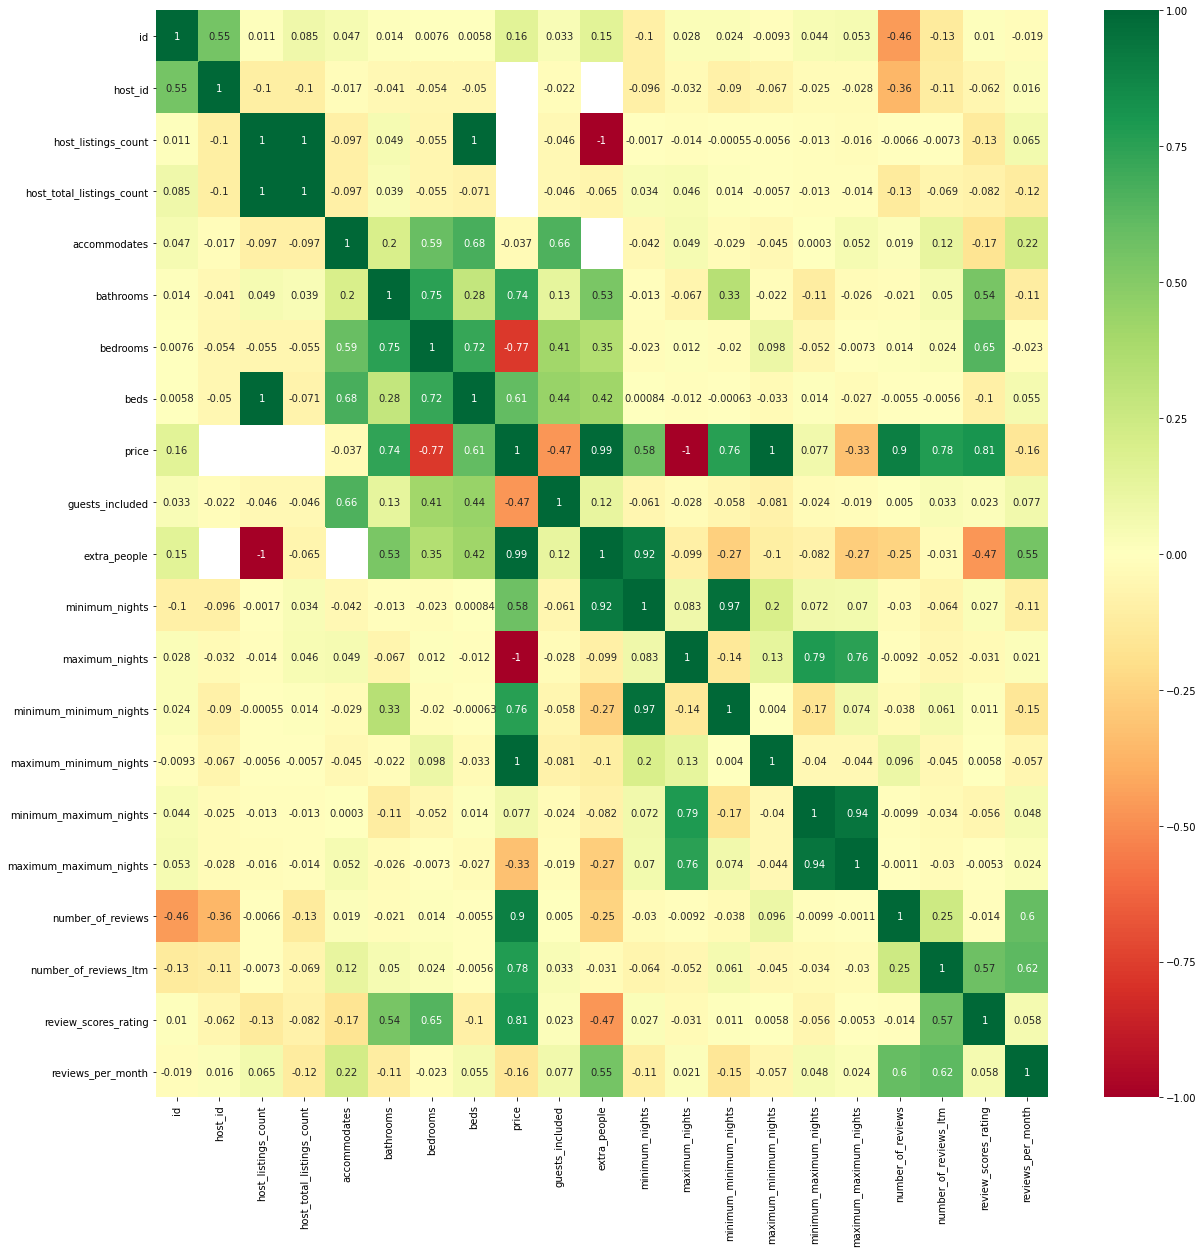

In [ ]:
#find good features using correlation matrix heatmap
#the target prediction is price
X = df.iloc[:, 0:29]
y = df["price"]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sb.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

newDF.info()

print(newDF.round(0).astype(int))
print(newDF.head(5))

train, test = train_test_split(newDF, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   accommodates            13049 non-null  int64
 1   bathrooms               13049 non-null  int64
 2   beds                    13049 non-null  int64
 3   guests_included         13049 non-null  int64
 4   extra_people            13049 non-null  int64
 5   minimum_nights          13049 non-null  int64
 6   minimum_minimum_nights  13049 non-null  int64
 7   maximum_maximum_nights  13049 non-null  int64
 8   number_of_reviews       13049 non-null  int64
 9   number_of_reviews_ltm   13049 non-null  int64
 10  review_scores_rating    13049 non-null  int64
 11  reviews_per_month       13049 non-null  int64
 12  price                   13049 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  ...  reviews_per_month  price
0                 1      

Training Process

In [ ]:
#training process
DST = DecisionTreeClassifier(criterion="gini", max_depth=10).fit(train[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]], train["review_scores_rating"])

Evaluate

In [ ]:
classification = DST.predict(test[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]])
accuracy = accuracy_score(test["review_scores_rating"], classification)
MAE = mean_absolute_error(test["review_scores_rating"], classification)
MSE = mean_squared_error(test["review_scores_rating"], classification)
F1  = f1_score(test["review_scores_rating"], classification, average='weighted') 
# cnf_matrix = confusion_matrix(test["review_scores_rating"], classification, labels=[0,1])


print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)
print(" F1  : %.2f" % F1)
print (classification_report(test["review_scores_rating"], classification))
print(cnf_matrix)

 ACC : 0.35
 MAE : 4.75
 MSE : 93.25
 F1  : 0.27
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00        17
        63.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         3
        68.0       0.00      0.00      0.00         2
        69.0       0.00      0.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: ignored

# Gaussian Mixture Model

In [1]:
#import libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Feature Engineering

In [2]:
#load dataset
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#fill missing values
df.fillna(0)

#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features from object to float (i tried to convert from object to int but it didn't work)
#selected features based on numeric dataset
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')

#data cleansing
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)
print(newDF.round(0).astype(int))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64
       accommodates  bathrooms  ...  reviews_per_month  price
0                 1          1  ...                  0      0
1                 2          1  ...                  1      0
2                 2          1  ...                  1      0
3                 2          1  ...                  1      0
4                 2          1  ...                  1      0
...             ...        ...  ...                ...    ...
13044             2          1  ...                  0      0
13045             3          1  ...                  0      0
13046             1          1  ...                  0      0
13047            15          2  ...       

In [3]:
#prepare data
X = newDF[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

In [5]:
KMN = KMeans(n_clusters=11).fit(X)
KMNLabels = KMN.labels_
KMNClusterCenters = KMN.cluster_centers_
Ypred = KMN.predict(X)

print("KMN Labels : ", KMNLabels)
print("KMN Cluster Centre : ", KMNClusterCenters)
print("Y Predict : ", Ypred)

KMN Labels :  [0 3 2 ... 7 2 7]
KMN Cluster Centre :  [[ 4.69831491e+00  1.22014858e+00  2.77658996e+00  2.34788911e+00
   4.85722573e-16  4.17938032e+00  3.90288096e+00  1.12385813e+03
   2.09648487e+01  1.24321435e+01  9.26160536e+01  1.10309839e+00
   3.62384490e-04]
 [ 0.00000000e+00  0.00000000e+00  1.16001300e+06  0.00000000e+00
   1.60000000e+01  4.00000000e+00  8.00000000e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+01
   0.00000000e+00]
 [ 4.35930233e+00  1.38372093e+00  3.08953488e+00  2.30232558e+00
   1.51162791e-02  4.16744186e+00  4.75000000e+00  1.27281395e+02
   2.63779070e+01  1.18232558e+01  7.93162791e+01  9.70930233e-01
  -2.28983499e-16]
 [ 4.29243827e+00  1.24459877e+00  2.63618827e+00  2.66859568e+00
   8.04911693e-16  2.89776235e+00  2.74074074e+00  3.66057870e+02
   2.00976080e+01  1.12118056e+01  7.68036265e+01  9.55246914e-01
   3.85802469e-03]
 [-5.32907052e-15  5.00000000e+00  1.27906977e+00 -5.32907052e-15
   2.1472868

In [6]:
#training with DBSCAN
DBS = DBSCAN().fit(X)
YPredict = DBS.fit_predict(X)
DBSLabels = DBS.labels_
DBSCore = DBS.core_sample_indices_
print("DBS Labels : ", DBSLabels)
print("DBS Core Sample : ", DBSCore)
print("Y Predict : ", Ypred)

DBS Labels :  [-1 -1 -1 ... -1 -1 27]
DBS Core Sample :  [  423   425   426   427  1267  1846  1847  1873  1883  1885  1935  1949
  1950  1951  1953  1958  1990  1991  1992  1993  1994  2444  2445  2446
  2795  2802  2856  3041  3052  3065  3069  3070  3071  3073  3074  3104
  3156  3163  3166  3169  3173  3193  3194  3197  3200  3201  3319  3389
  3469  3487  3521  3523  3725  3843  3866  3867  3995  3997  3998  3999
  4000  4096  4097  4713  4993  5169  5367  5684  5688  5690  5693  5694
  5695  5696  5778  5939  6311  6321  6328  6336  6363  6384  6386  6387
  6388  6389  6390  6439  6459  6508  6622  6647  6912  6972  7045  7179
  7208  7229  7270  7272  7273  7274  7276  7277  7280  7282  7283  7284
  7286  7288  7291  7292  7293  7295  7299  7300  7301  7302  7303  7304
  7305  7307  7308  7311  7312  7313  7314  7315  7318  7321  7322  7380
  7384  7386  7387  7400  7401  7404  7405  7406  7408  7411  7412  7413
  7414  7416  7417  7418  7427  7428  7432  7435  7436  7438  7439 

Gaussian Mixture Model

Y Predict :  [0 3 2 ... 7 2 7]


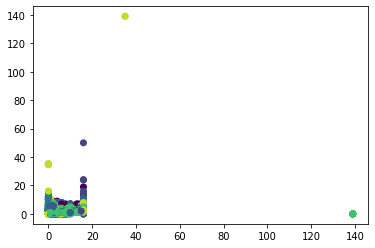

GMM:  0.6036752745397292


In [8]:
GMM = GaussianMixture(n_components=11).fit(X)
YPredict = GMM.predict(X)
print("Y Predict : ", Ypred)

plt.scatter(X.iloc[:,0], X.iloc[:,1],c = Ypred)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()
print("GMM: ", silhouette_score(X, Ypred))

#KMeans Clustering

In [9]:
#import libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [10]:
#load dataset
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#fill missing values
df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,0,0


In [11]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features from object to float (i tried to convert from object to int but it didn't work)
#selected features based on numeric dataset
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')

In [12]:
#data cleansing
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#split dataset to training and testing
# train, test = train_test_split(df, test_size=0.2)

In [13]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

newDF.info() 

print(newDF.round(0).astype(int))
print(newDF.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   accommodates            13049 non-null  int64
 1   bathrooms               13049 non-null  int64
 2   beds                    13049 non-null  int64
 3   guests_included         13049 non-null  int64
 4   extra_people            13049 non-null  int64
 5   minimum_nights          13049 non-null  int64
 6   minimum_minimum_nights  13049 non-null  int64
 7   maximum_maximum_nights  13049 non-null  int64
 8   number_of_reviews       13049 non-null  int64
 9   number_of_reviews_ltm   13049 non-null  int64
 10  review_scores_rating    13049 non-null  int64
 11  reviews_per_month       13049 non-null  int64
 12  price                   13049 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  ...  reviews_per_month  price
0                 1      

In [14]:
#prepare data
X = newDF[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

In [15]:
KMN = KMeans(n_clusters=11).fit(X)
KMNLabels = KMN.labels_
KMNClusterCenters = KMN.cluster_centers_
Ypred = KMN.predict(X)

print("KMN Labels : ", KMNLabels)
print("KMN Cluster Centre : ", KMNClusterCenters)
print("Y Predict : ", Ypred)

KMN Labels :  [2 0 5 ... 8 5 8]
KMN Cluster Centre :  [[ 4.29243827e+00  1.24459877e+00  2.63618827e+00  2.66859568e+00
   8.04911693e-16  2.89776235e+00  2.74074074e+00  3.66057870e+02
   2.00976080e+01  1.12118056e+01  7.68036265e+01  9.55246914e-01
   3.85802469e-03]
 [ 0.00000000e+00  0.00000000e+00  1.16001300e+06  0.00000000e+00
   1.60000000e+01  4.00000000e+00  8.00000000e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+01
   0.00000000e+00]
 [ 4.68614755e+00  1.21468734e+00  2.77815642e+00  2.35321179e+00
  -1.17961196e-15  4.12370080e+00  3.84239223e+00  1.12382569e+03
   2.49361050e+01  1.32617141e+01  9.27497018e+01  1.17328335e+00
   3.40773556e-04]
 [ 3.90771812e+00  1.76510067e+00  3.17114094e+00  2.07941834e+00
   4.02684564e-02  1.83501119e+00  1.79474273e+00  2.92958613e+01
   3.97360179e+01  1.76202461e+01  8.18456376e+01  1.45022371e+00
   3.52348993e-02]
 [-5.32907052e-15  5.00000000e+00  1.27906977e+00 -5.32907052e-15
   2.1472868

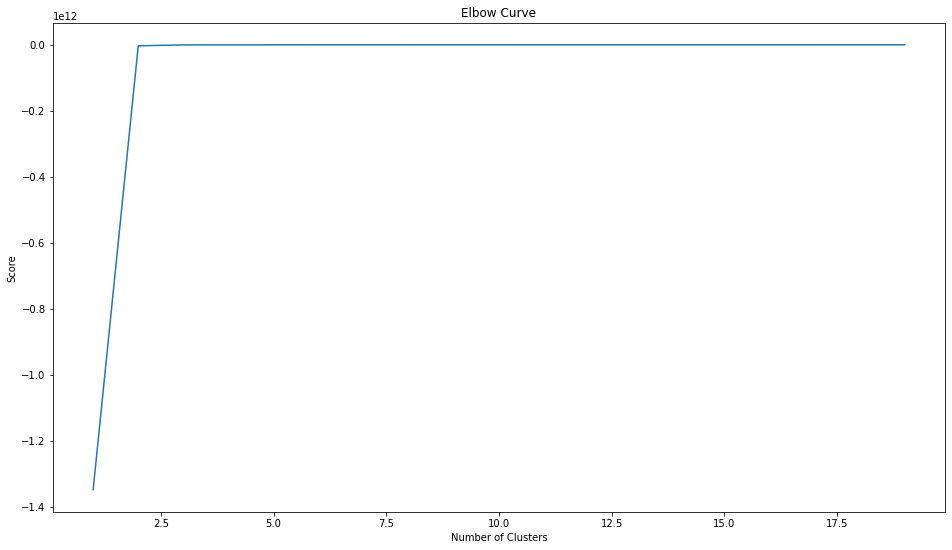

In [16]:
#Choosing the right number of K  with Elbow Curve
Ks = range(1, 20)
KMNs = [KMeans(n_clusters=i) for i in Ks]
score = [KMNs[i].fit(X).score(X) for i in range(len(KMNs))]
plt.plot(Ks, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#plot groups based on the features

plt.subplot(221)
sb.swarmplot(KMNLabels , X["accommodates"])
plt.subplot(222)
sb.swarmplot(KMNLabels , X["bathrooms"])
plt.subplot(223)
sb.swarmplot(KMNLabels , X["beds"])
plt.subplot(224)
sb.swarmplot(KMNLabels , X["guests_included"])

plt.subplot(231)
sb.swarmplot(KMNLabels , X["extra_people"])
plt.subplot(232)
sb.swarmplot(KMNLabels , X["minimum_nights"])
plt.subplot(233)
sb.swarmplot(KMNLabels , X["minimum_minimum_nights"])
plt.subplot(234)
sb.swarmplot(KMNLabels , X["maximum_maximum_nights"])

plt.subplot(241)
sb.swarmplot(KMNLabels , X["number_of_reviews"])
plt.subplot(242)
sb.swarmplot(KMNLabels , X["number_of_reviews_ltm"])
plt.subplot(243)
sb.swarmplot(KMNLabels , X["review_scores_rating"])
plt.subplot(244)
sb.swarmplot(KMNLabels , X["price"])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [ ]:
#visualize KMeans

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = Ypred)
plt.scatter(KMNClusterCenters[:, 0], KMNClusterCenters[:, 1], c = "b", s=200, alpha=0.5);
plt.show()
print("KMeans: ", silhouette_score(X, Ypred))